Première cell pour éxécuter dans environnement avec discrete_optimization de github mais pas installer en package python

In [1]:
import sys 
sys.path.append("/Users/AGAUVZFV/Desktop/discrete-optimization")
import os
os.environ["DO_SKIP_MZN_CHECK"] = "1" 

other useful import

In [2]:
from discrete_optimization.maximum_independent_set.mis_model import MisProblem
from discrete_optimization.maximum_independent_set.solvers.mis_gurobi import MisMilpSolver
from discrete_optimization.maximum_independent_set.mis_plot import plot_mis_solution, plot_mis_graph
from discrete_optimization.maximum_independent_set.solvers.mis_quantum import QAOAMisSolver
from qiskit_aer import AerSimulator
import networkx as nx

The objectif of this tutorial is to present how we can use discrete_optimization to solve optimization problem using quantum simulator or quantum real device with qiskit. 

It's free to use simulator but to use quantum real divice you need an IBM account. You can have one for free BUT you will be limited to ten minutes of use by month and you can't use session (we talk about session a bit later) who is a very pratical way to execute job on real device.

This tutorial has not to purpose to present a method to solve very large problem, nothing of revolutionnary here, just a quantum gadget to see what we can do actually with quantum technologies, the good point as the bad point.

The first step is, of course, to creat the problem to solve, here we are going to solve a maximum_independent_set.
In a graph we search a subset of nodes who are not connected two by two. We want to maximize the side of this subset.
An example of a graph with 6 nodes where the maximum_independent_set is the subset of nodes (1,5,6).

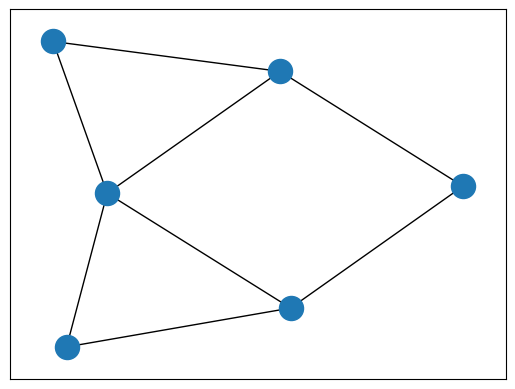

In [3]:
    graph = nx.Graph()

    graph.add_edge(1, 2)
    graph.add_edge(1, 3)
    graph.add_edge(2, 4)
    graph.add_edge(2, 6)
    graph.add_edge(3, 4)
    graph.add_edge(3, 5)
    graph.add_edge(4, 5)
    graph.add_edge(4, 6)

    misProblem = MisProblem(graph)
    plot_mis_graph(misProblem)

We are going to see how solve this problem with a non-noisy quantum simulator or a real quantum device. We develop a tools that just need a MisProblem object and a qiskit backend object and who can solve the mis Problem using the QAOA algorithm. Quantum approximate optimization algorithm is a well-known hybrid algorithm that use the Ising representation of a QUBO problem. LIEN vers article QAOA + ising formulation Article présentant l'algorithm QAOA : https://arxiv.org/abs/1411.4028 

In [6]:
# we declare the MisProblem
misProblem = MisProblem(graph)

# we declare the QAOA solver we are going to use
misSolver = QAOAMisSolver(misProblem)

# then we need a backend, a backend is an object wo define how and where the quantum part of the algorithm is run
# it can be a simulator or a real quantum device

# here we declare a simulator
backend = AerSimulator()

# then we need to initialize the solver, in fact we transform the mis problem on his QUBO form
misSolver.init_model()

# after that we can run the solver using the defined backend
res = misSolver.solve(backend=backend)

sol, _ = res.get_best_solution_fit()
print(sol)

C:\Users\AGAUVZFV\AppData\Local\miniconda3\envs\d-opti\Lib\site-packages\qiskit_ibm_runtime\fake_provider\local_service.py:243: UserWarning: Options {'default_shots': 10000} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


Iters. done: 1 [Current cost: -0.583984375]
Iters. done: 2 [Current cost: 0.0556640625]
Iters. done: 3 [Current cost: -0.207763671875]
Iters. done: 4 [Current cost: -0.89794921875]
Iters. done: 5 [Current cost: -0.594482421875]
Iters. done: 6 [Current cost: 1.247802734375]
Iters. done: 7 [Current cost: -0.0087890625]
Iters. done: 8 [Current cost: -0.426513671875]
Iters. done: 9 [Current cost: -0.564208984375]
Iters. done: 10 [Current cost: -0.8447265625]
Iters. done: 11 [Current cost: -0.4990234375]
Iters. done: 12 [Current cost: -0.824462890625]
Iters. done: 13 [Current cost: -0.923828125]
Iters. done: 14 [Current cost: -0.868896484375]
Iters. done: 15 [Current cost: -0.927978515625]
Iters. done: 16 [Current cost: -0.944580078125]
Iters. done: 17 [Current cost: -0.950439453125]
Iters. done: 18 [Current cost: -0.951171875]
Iters. done: 19 [Current cost: -0.910400390625]
Iters. done: 20 [Current cost: -0.959228515625]
Iters. done: 21 [Current cost: -0.942626953125]
Iters. done: 22 [Curr

If you have an IBM account you can declare the backend as follow, where the "token" parameter is your personnal IBM token to use a real quantum device. If you have a premium account please set the parameter "use-session" of the solver to True. A session give a guaranted acces to the device, if you don't use session, you can have a lot of waiting time beetween two different job (because other jobs can be insert in the queue). In QAOA we create a new job at each iteration of the optimizer and one final job after the minimization step is over.

In [5]:
# from qiskit_ibm_runtime import QiskitRuntimeService

# service = QiskitRuntimeService(channel="ibm_quantum", token=token)
# backend = service.least_busy(operational=True, simulator=False)
# misSolver.init_model()
# misSolver.solve(backend=backend, use_session=True)
# sol, _ = res.get_best_solution_fit()
# print(sol)

Here we have not define any parameters except the backend, in fact there is a lot of parameters we can chose.

They can be defined in a kwargs parameter

Hyperparameters we can modifiy and can influence the performance of the algorithm are :

- "method" the scipy optimizer we want to use for the classical optimization step
- "reps" : the deep of the quantum circuit
- "optimization_level" : the level of optimization of the circuit
- "nb_shots" who define the number of time we want to repeat the quantum circuit (not used on simulator)

by default we use the "COBYLA" method, you can give value for three hyperparameters in the kwargs :

- maxiter : the maximum number of iteration of the optimizer
- rhobeg : ???
- tol : ???

for all other scipy optimizer https://docs.scipy.org/doc/scipy-1.13.1/reference/generated/scipy.optimize.minimize.html (or it's also possible for cobyla), if you want to define some parameters you can do it with a kwargs parameter "options", who is a dictionnary of possible options for the optimizer.



In [ ]:
# kwargs = {"method": "your_method"}
# options = {"options1": op1, "options2": op2, ...}
# kwargs["options"] = options

There is also the possibility to use an optimizer define in qiskit_algorithms (https://github.com/qiskit-community/qiskit-algorithms/tree/stable/0.3/qiskit_algorithms/optimizers). To use one of them you have just te create it and then passed it in the kwargs as "optimizer" parameter.

In [7]:
# optimizer = SPSA()
# kwargs = {"optimizer": optimizer} or kwargs["optimizer"] = optimizer if kwargs already exist